# GSE106582

Accuracy: 96.27%
Precision: 0.96
Recall: 0.96
F1-score: 0.96
MCC: 0.92
Confusion Matrix:
 [[79  2]
 [ 3 50]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        81
           1       0.96      0.94      0.95        53

    accuracy                           0.96       134
   macro avg       0.96      0.96      0.96       134
weighted avg       0.96      0.96      0.96       134



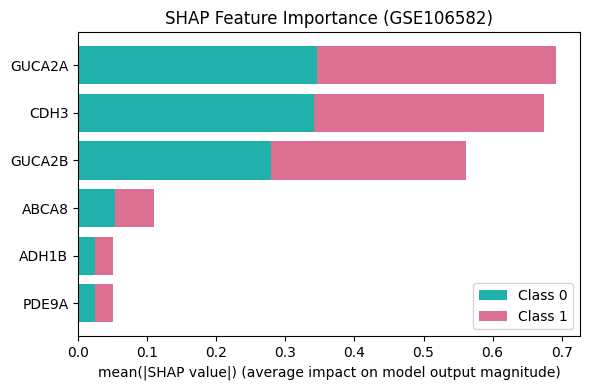

In [ ]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.linear_model import LogisticRegression
import warnings

warnings.filterwarnings("ignore")

# Load datasets
df_train = pd.read_csv("ML_DEG_dataset.csv")
columns_of_interest = ['ADH1B','CDH3', 'GUCA2B', 'PDE9A', 'ABCA8', 'GUCA2A',  'target']
df_train = df_train[columns_of_interest]
#df_train = df_train.iloc[:, 1:]
df_train = df_train[[col for col in df_train.columns if col != 'target'] + ['target']]
X_train = df_train.iloc[:, :-1]
y_train = df_train.iloc[:, -1]

df_test = pd.read_csv("GSE106582_gene_expression_renamed.csv")
df_test = df_test.iloc[:, 1:]
df_test = df_test[[col for col in df_test.columns if col != 'target'] + ['target']]
X_test = df_test.iloc[:, :-1]
y_test = df_test.iloc[:, -1]

# Ensure common features
common_cols = list(set(X_train.columns).intersection(X_test.columns))
X_train_common = X_train[common_cols]
X_test_common = X_test[common_cols]

# Train model

log_reg = LogisticRegression(C=0.01, max_iter=500, penalty= 'l2', solver= 'saga')
log_reg.fit(X_train_common, y_train)
predictions = log_reg.predict(X_test_common)

# Evaluation
print(f"Accuracy: {accuracy_score(y_test, predictions) * 100:.2f}%")
print(f"Precision: {precision_score(y_test, predictions, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, predictions, average='weighted'):.2f}")
print(f"F1-score: {f1_score(y_test, predictions, average='weighted'):.2f}")
print(f"MCC: {matthews_corrcoef(y_test, predictions):.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))

# SHAP explanation
explainer = shap.Explainer(log_reg, X_train_common)
shap_values = explainer(X_test_common)
shap_vals = shap_values.values

# Separate SHAP values by predicted class
class_0_idx = np.where(predictions == 0)[0]
class_1_idx = np.where(predictions == 1)[0]

class_0_mean = np.abs(shap_vals[class_0_idx]).mean(axis=0)
class_1_mean = np.abs(shap_vals[class_1_idx]).mean(axis=0)
features = X_test_common.columns

# Sort features by total SHAP importance
total_mean = class_0_mean + class_1_mean
sorted_idx = np.argsort(total_mean)[::-1]
features_sorted = features[sorted_idx]
class_0_sorted = class_0_mean[sorted_idx]
class_1_sorted = class_1_mean[sorted_idx]

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(6, 4))
ax.barh(features_sorted, class_0_sorted, color='lightseagreen', label='Class 0')
ax.barh(features_sorted, class_1_sorted, left=class_0_sorted, color='palevioletred', label='Class 1')

ax.set_xlabel('mean(|SHAP value|) (average impact on model output magnitude)')
ax.set_title('SHAP Feature Importance (GSE106582)')
ax.legend()
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

Logistic Regression Testing Accuracy: 96.91%
Precision: 0.97
Recall: 0.97
F1-Score: 0.97
MCC: 0.94
Confusion Matrix:
[[114   3]
 [  3  74]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       117
           1       0.96      0.96      0.96        77

    accuracy                           0.97       194
   macro avg       0.97      0.97      0.97       194
weighted avg       0.97      0.97      0.97       194



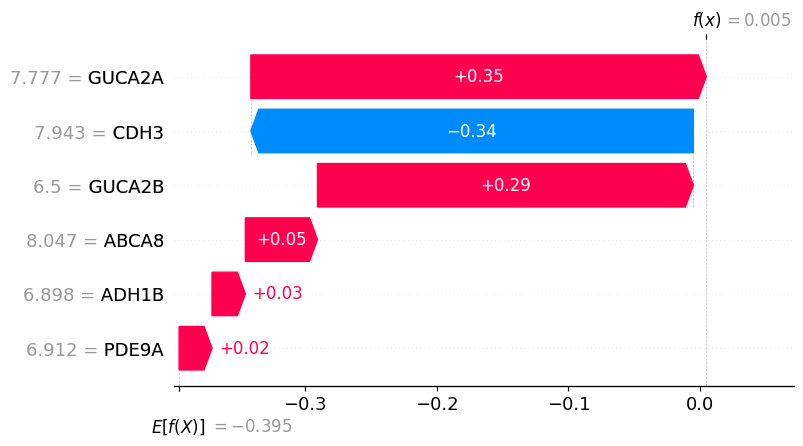

In [ ]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.linear_model import LogisticRegression
import warnings

warnings.filterwarnings("ignore")

# Load datasets
df_train = pd.read_csv("ML_DEG_dataset.csv")
columns_of_interest = ['ADH1B','CDH3', 'GUCA2B', 'PDE9A', 'ABCA8', 'GUCA2A',  'target']
df_train = df_train[columns_of_interest]
#df_train = df_train.iloc[:, 1:]
df_train = df_train[[col for col in df_train.columns if col != 'target'] + ['target']]
X_train = df_train.iloc[:, 0:-1]
y_train = df_train.iloc[:, -1]

df_test = pd.read_csv("GSE106582_gene_expression_renamed.csv")
df_test = df_test.iloc[:, 1:]
df_test = df_test[[col for col in df_test.columns if col != 'target'] + ['target']]
X_test = df_test.iloc[:, 0:-1]
y_test = df_test.iloc[:, -1]

# Ensure common features
common_cols = list(set(X_train.columns).intersection(X_test.columns))
X_train_common = X_train[common_cols]
X_test_common = X_test[common_cols]

# Logistic Regression model
log_reg =  LogisticRegression(C=0.01, max_iter=500, penalty= 'l2', solver= 'saga')

# Train model
log_reg.fit(X_train_common, y_train)

# Predictions
predictions = log_reg.predict(X_test_common)

# Evaluation
test_accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted', zero_division=0)
recall = recall_score(y_test, predictions, average='weighted', zero_division=0)
f1 = f1_score(y_test, predictions, average='weighted', zero_division=0)
mcc = matthews_corrcoef(y_test, predictions)

print(f"Logistic Regression Testing Accuracy: {test_accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"MCC: {mcc:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print("Classification Report:")
print(classification_report(y_test, predictions))

# SHAP explanation
explainer = shap.Explainer(log_reg, X_train_common)
shap_values = explainer(X_test_common)

# Plot summary for global interpretability
#shap.summary_plot(shap_values, X_test_common)

# Explain a specific instance
instance_idx = 0
shap.plots.waterfall(shap_values[instance_idx])

# GSE21815

Accuracy: 99.29%
Precision: 0.99
Recall: 0.99
F1-score: 0.99
MCC: 0.94
Confusion Matrix:
 [[  8   1]
 [  0 132]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.99      1.00      1.00       132

    accuracy                           0.99       141
   macro avg       1.00      0.94      0.97       141
weighted avg       0.99      0.99      0.99       141



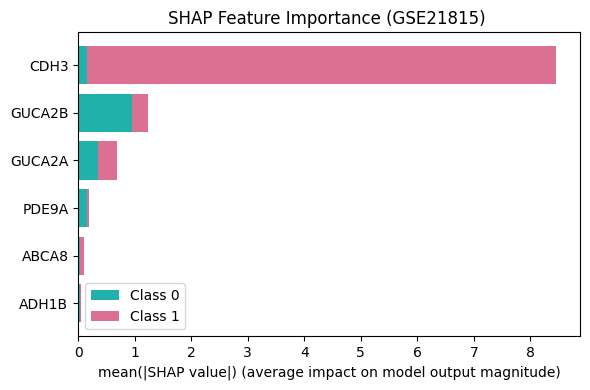

In [ ]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier,
    AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
)
import warnings

warnings.filterwarnings("ignore")

# Load datasets
df_train = pd.read_csv("ML_DEG_dataset.csv")
columns_of_interest = ['ADH1B','CDH3', 'GUCA2B', 'PDE9A', 'ABCA8', 'GUCA2A',  'target']
df_train = df_train[columns_of_interest]
#df_train = df_train.iloc[:, 1:]
df_train = df_train[[col for col in df_train.columns if col != 'target'] + ['target']]
X_train = df_train.iloc[:, :-1]
y_train = df_train.iloc[:, -1]

df_test = pd.read_csv("GSE21815_gene_expression_renamed.csv")
df_test = df_test.iloc[:, 1:]
df_test = df_test[[col for col in df_test.columns if col != 'target'] + ['target']]
X_test = df_test.iloc[:, :-1]
y_test = df_test.iloc[:, -1]

# Ensure common features
common_cols = list(set(X_train.columns).intersection(X_test.columns))
X_train_common = X_train[common_cols]
X_test_common = X_test[common_cols]

# Train model
rf_model = LogisticRegression(max_iter=1000)
rf_model.fit(X_train_common, y_train)
predictions = rf_model.predict(X_test_common)

# Evaluation
print(f"Accuracy: {accuracy_score(y_test, predictions) * 100:.2f}%")
print(f"Precision: {precision_score(y_test, predictions, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, predictions, average='weighted'):.2f}")
print(f"F1-score: {f1_score(y_test, predictions, average='weighted'):.2f}")
print(f"MCC: {matthews_corrcoef(y_test, predictions):.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))

# SHAP explanation
explainer = shap.Explainer(log_reg, X_train_common)
shap_values = explainer(X_test_common)
shap_vals = shap_values.values

# Separate SHAP values by predicted class
class_0_idx = np.where(predictions == 0)[0]
class_1_idx = np.where(predictions == 1)[0]

class_0_mean = np.abs(shap_vals[class_0_idx]).mean(axis=0)
class_1_mean = np.abs(shap_vals[class_1_idx]).mean(axis=0)
features = X_test_common.columns

# Sort features by total SHAP importance
total_mean = class_0_mean + class_1_mean
sorted_idx = np.argsort(total_mean)[::-1]
features_sorted = features[sorted_idx]
class_0_sorted = class_0_mean[sorted_idx]
class_1_sorted = class_1_mean[sorted_idx]

# Plot stacked bar chart
fig, ax = plt.subplots(figsize=(6, 4))
ax.barh(features_sorted, class_0_sorted, color='lightseagreen', label='Class 0')
ax.barh(features_sorted, class_1_sorted, left=class_0_sorted, color='palevioletred', label='Class 1')

ax.set_xlabel('mean(|SHAP value|) (average impact on model output magnitude)')
ax.set_title('SHAP Feature Importance (GSE21815) ')
ax.legend()
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

Logistic Regression Testing Accuracy: 99.29%
Precision: 0.99
Recall: 0.99
F1-Score: 0.99
MCC: 0.94
Confusion Matrix:
[[  8   1]
 [  0 132]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.99      1.00      1.00       132

    accuracy                           0.99       141
   macro avg       1.00      0.94      0.97       141
weighted avg       0.99      0.99      0.99       141



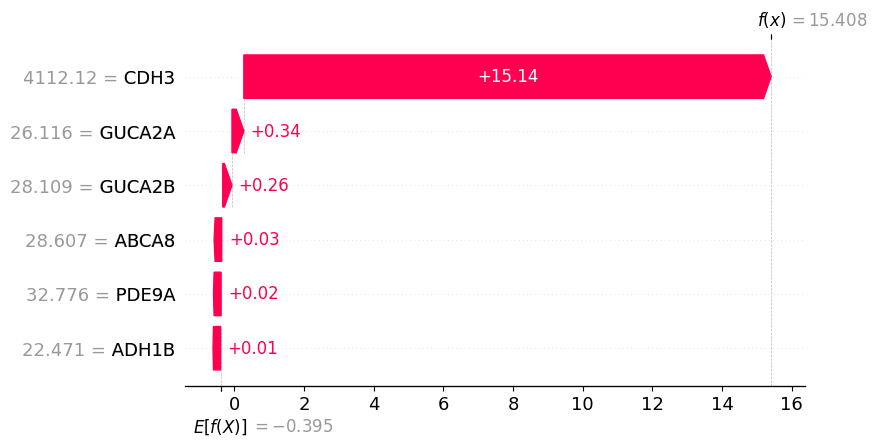

In [ ]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier,
    AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
)
import warnings

warnings.filterwarnings("ignore")

# Load datasets
df_train = pd.read_csv("ML_DEG_dataset.csv")
columns_of_interest = ['ADH1B','CDH3', 'GUCA2B', 'PDE9A', 'ABCA8', 'GUCA2A',  'target']
df_train = df_train[columns_of_interest]
#df_train = df_train.iloc[:, 1:]
df_train = df_train[[col for col in df_train.columns if col != 'target'] + ['target']]
X_train = df_train.iloc[:, 0:-1]
y_train = df_train.iloc[:, -1]

df_test = pd.read_csv("GSE21815_gene_expression_renamed.csv")
df_test = df_test.iloc[:, 1:]
df_test = df_test[[col for col in df_test.columns if col != 'target'] + ['target']]
X_test = df_test.iloc[:, 0:-1]
y_test = df_test.iloc[:, -1]

# Ensure common features
common_cols = list(set(X_train.columns).intersection(X_test.columns))
X_train_common = X_train[common_cols]
X_test_common = X_test[common_cols]

# Logistic Regression model
rf_model = LogisticRegression(max_iter=1000)

# Train model
rf_model.fit(X_train_common, y_train)

# Predictions
predictions = rf_model.predict(X_test_common)

# Evaluation
test_accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions, average='weighted', zero_division=0)
recall = recall_score(y_test, predictions, average='weighted', zero_division=0)
f1 = f1_score(y_test, predictions, average='weighted', zero_division=0)
mcc = matthews_corrcoef(y_test, predictions)

print(f"Logistic Regression Testing Accuracy: {test_accuracy * 100:.2f}%")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"MCC: {mcc:.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print("Classification Report:")
print(classification_report(y_test, predictions))

# SHAP explanation
explainer = shap.Explainer(log_reg, X_train_common)
shap_values = explainer(X_test_common)

# Plot summary for global interpretability
#shap.summary_plot(shap_values, X_test_common)

# Explain a specific instance
instance_idx = 0
shap.plots.waterfall(shap_values[instance_idx])


# GSE44076

Accuracy: 99.32%
Precision: 0.99
Recall: 0.99
F1-score: 0.99
MCC: 0.99
Confusion Matrix:
 [[50  0]
 [ 1 97]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       1.00      0.99      0.99        98

    accuracy                           0.99       148
   macro avg       0.99      0.99      0.99       148
weighted avg       0.99      0.99      0.99       148


Calculating SHAP values...


PermutationExplainer explainer: 149it [06:23,  2.61s/it]


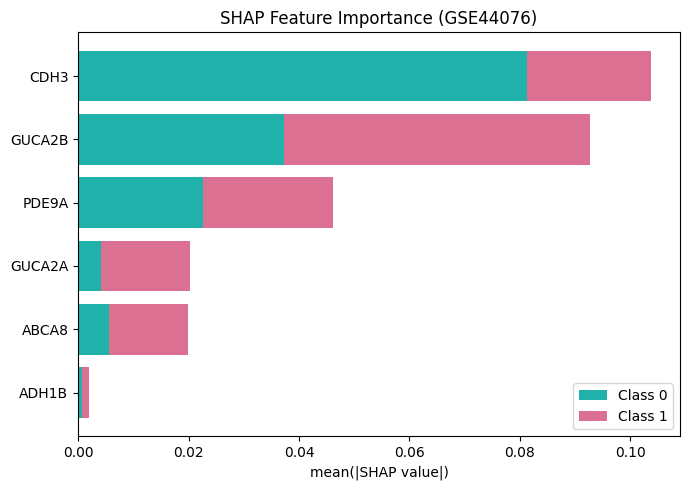

In [ ]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from sklearn.metrics import *
from sklearn.ensemble import AdaBoostClassifier
import warnings

warnings.filterwarnings("ignore")

# -------------------------
# Load Training Data
# -------------------------
df_train = pd.read_csv("ML_DEG_dataset.csv")
columns_of_interest = ['ADH1B','CDH3', 'GUCA2B', 'PDE9A', 'ABCA8', 'GUCA2A', 'target']
df_train = df_train[columns_of_interest]
df_train = df_train[[col for col in df_train.columns if col != 'target'] + ['target']]

X_train = df_train.iloc[:, :-1]
y_train = df_train.iloc[:, -1]

# -------------------------
# Load Test Data
# -------------------------
df_test = pd.read_csv("GSE44076_gene_expression_renamed.csv")
df_test = df_test.iloc[:, 1:]
df_test = df_test[[col for col in df_test.columns if col != 'target'] + ['target']]

X_test = df_test.iloc[:, :-1]
y_test = df_test.iloc[:, -1]

# -------------------------
# Ensure Common Features
# -------------------------
common_cols = list(set(X_train.columns).intersection(X_test.columns))
X_train_common = X_train[common_cols]
X_test_common = X_test[common_cols]

# -------------------------
# Train AdaBoost
# -------------------------
model = AdaBoostClassifier(
    n_estimators=250,
    learning_rate=np.float64(0.2575)
)
model.fit(X_train_common, y_train)
predictions = model.predict(X_test_common)

# -------------------------
# Evaluate
# -------------------------
print(f"Accuracy: {accuracy_score(y_test, predictions) * 100:.2f}%")
print(f"Precision: {precision_score(y_test, predictions, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, predictions, average='weighted'):.2f}")
print(f"F1-score: {f1_score(y_test, predictions, average='weighted'):.2f}")
print(f"MCC: {matthews_corrcoef(y_test, predictions):.2f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))

# -------------------------
# SHAP Explanation (Correct for AdaBoost)
# -------------------------
print("\nCalculating SHAP values...")

explainer = shap.Explainer(
    model.predict_proba,
    X_train_common,
    algorithm="permutation"
)

shap_values = explainer(X_test_common)   # shape: (148, features)

# shap_values.values → (samples × features × classes)
shap_vals = shap_values.values[:, :, 1]   # class 1

# -------------------------
# SHAP Aggregation
# -------------------------
class_0_idx = np.where(predictions == 0)[0]
class_1_idx = np.where(predictions == 1)[0]

class_0_mean = np.abs(shap_vals[class_0_idx]).mean(axis=0)
class_1_mean = np.abs(shap_vals[class_1_idx]).mean(axis=0)

features = np.array(X_test_common.columns)

total_mean = class_0_mean + class_1_mean
sorted_idx = np.argsort(total_mean)[::-1]

features_sorted = features[sorted_idx]
class_0_sorted = class_0_mean[sorted_idx]
class_1_sorted = class_1_mean[sorted_idx]

# -------------------------
# Plot Stacked Feature Importance
# -------------------------
plt.figure(figsize=(7, 5))
plt.barh(features_sorted, class_0_sorted, color='lightseagreen', label='Class 0')
plt.barh(features_sorted, class_1_sorted, left=class_0_sorted, color='palevioletred', label='Class 1')

plt.xlabel('mean(|SHAP value|)')
plt.title('SHAP Feature Importance (GSE44076)')
plt.gca().invert_yaxis()
plt.legend()
plt.tight_layout()
plt.show()



Generating SHAP Waterfall Chart for sample index: 0


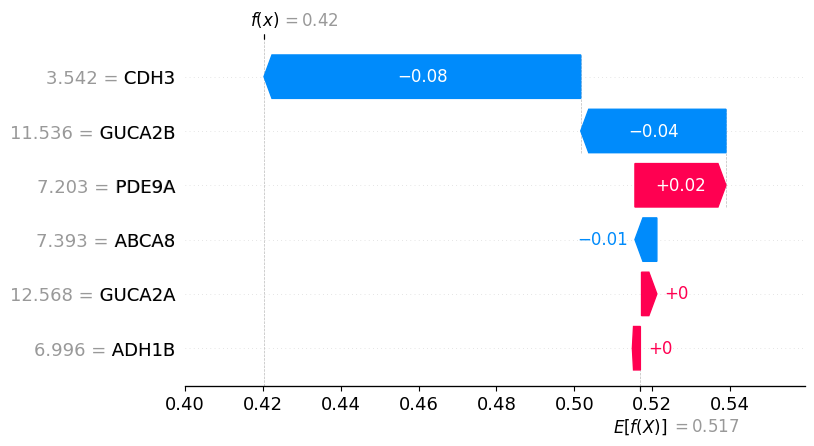

In [ ]:
# -------------------------
# SHAP Waterfall Plot (Single Instance)
# -------------------------

# Choose one test sample (you can change the index)
sample_index = 0

print(f"\nGenerating SHAP Waterfall Chart for sample index: {sample_index}")

# Compute SHAP values for the selected sample
sample_shap = shap_values[sample_index]

# Convert to class-1 SHAP contributions
sample_shap_class1 = sample_shap.values[:, 1]

# Extract base value
base_value = sample_shap.base_values[1]

# Create waterfall plot
shap.plots.waterfall(
    shap.Explanation(
        values=sample_shap_class1,
        base_values=base_value,
        data=X_test_common.iloc[sample_index],
        feature_names=X_test_common.columns
    ),
    max_display=len(X_test_common.columns)
)
